In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem.Fraggle import FraggleSim
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdmolops
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import rdDepictor
import numpy as np
from random import randrange

#from rdkit import rdBase
#rdBase.DisableLog('rdApp.error')
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [2]:
meta=[['[#6]-[#8]-c1ccc(-[96*])cc1-[98*]', 9.0,-1], # 2-Methoxyphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#7]-C1=CC(-[96*])=CC(-[98*])=C1', 8.9,-1], # 3-Aminophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['C1=CC(-[96*])=CC(-[98*])=C1', 8.8,-1], # Phenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC=C(-[98*])C=C1-[96*]', 8.6,-1], # 4-Fluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051 
    ['ClC1=CC(Cl)=C(-[98*])C=C1-[96*]', 8.5,-1], # 2,4-Diclorophenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['ClC1=CC=C(-[98*])C(Cl)=C1-[96*]', 8.5,-1], # 2,4-Diclorophenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['Br-C1=CC=C(-[98*])C=C1-[96*]', 8.8,-1], # 4-Bromophenylboronic acid DOI:10.1016/j.tet.2004.08.051 
    ['[#7]-[#6]-C1=CC=C(-[98*])C=C1-[96*]', 8.3,-1], # 4-Aminomethylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CN=CC(-[98*])=C1', 8.1,-1], # 3-Pyridinylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC(-[98*])=CC=N1', 8.0,-1], # 4-Pyridinylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#8]-[#6](=O)-C1=CC=C(-[98*])C=C1-[96*]', 8.0,-1], # 4-Carboxyphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#6](=O)-C1=CC(-[96*])=CC(-[98*])=C1', 8.0,-1], # 3-Acetophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=C(Cl)C=C(-[98*])C=C1-[96*]', 7.8,-1], # 3-Chloro-4-fluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC(-[98*])=CC(-[#6]=O)=C1', 7.8,-1], # 3-Formylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#6](=O)-C1=CC=C(-[98*])C=C1-[96*]', 7.7,-1], # 4-Acetylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC(-[98*])=CC=C1-[#6]=O', 7.6,-1], # 4-Formylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(F)=C(-[98*])C=C1-[96*]', 7.6,-1], # 2,4-Difluorophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC=C(-[98*])C(F)=C1-[96*]', 7.6,-1], # 2,4-Difluorophenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['[#8-]-[#7+](=O)-C1=CC(-[96*])=CC(-[98*])=C1', 7.1, -1], # 3-Nitrophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(-[98*])=C(F)C(-[96*])=C1F', 6.8,-1], # 3,4,5-Trifluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=C(F)C(-[96*])=CC(-[98*])=C1F', 6.8,-1], # 2,3,4-Trifluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(-[98*])=C(F)C(-[96*])=C1F', 6.7,-1], # 2,4,5-Trifluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#7+](-[#6])-[#6]-C1=CC=C(-[96*])C=C1-[98*]', 5.3,-1], # 2-Dimethylaminomethylphenylboronic acid (DAPBA) DOI:10.1016/j.tet.2004.08.051
    ['[#8-]-[#7+](=O)-C1=CC(-[96*])=C(F)C(-[98*])=C1', 6.0,-1], # 2-Fluoro-5-nitrophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#6]-C1=CC(-[98*])=C[N+](-[#6]-[96*])=C1', 4.4,-1], # 5-Methylpyridine-3-boronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-[#6]-[N+]1=CC=CC(-[98*])=C1', 4.4,-1], # 3-Methylpyridineboronic acid  DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=C(-[#6]=O)C(-[98*])=C1', 7.31,-1], # 2-Formylphenilboronic acid DOI:10.3390/molecules25040799
    ['FC1=CC(-[96*])=CC(-[98*])=C1', 7.5,-1], # 3-Fluorophenilboronic acid DOI:10.3390/molecules25040799
    ['FC(F)(F)C1=CC(-[96*])=CC(-[98*])=C1', 7.85,-1], # 3-Metiltrifluorophenilboronic acid DOI:10.3390/molecules25040799       
    ['[96*]-C1=CC(-[98*])=CC=C1S(=O)(=O)[#6]-[#6]-[#6]=[#6]', 7.1,-1], # 4-(3-butenylsulfonyl)phenylboronic acid BSPBA DOI:10.1016/j.ab.2007.09.001 Bonding to silicon trough double bond in alkyl chain
    ['[96*]-C1=CC(-[98*])=CC=C1S(=O)(=O)[#7]-[#6]-[#6]=[#6]', 7.4 ,-1], # 4-(N-allylsulfamoyl)phenylboronic acid BSPBA DOI:10.1016/j.ab.2007.09.001 Bonding to silicon trough double bond in alkyl chain
    ['[#7]-C1=CC(-[98*])=CC(-[96*])=C1-[#7+](-[#8-])=O', 7.1,-1], # (3-amino-4nitrophenyl)boronic acid DOI:10.3390/molecules25040799 Binding to silica the amino group
    ['[96*]-C1=CC(-[98*])=CC(-[#7]-[#6](=O)-[#6]=[#6])=C1', 8.2,-1], # 3-acrylamidophenylboronic acid (AAPBA) See the review DOI: 10.1039/C5CS00013K
    ['[96*]-C1=CC(-[98*])=CC=C1-[#6](=O)-[#7]-[#6]-[#6]-[#7]-[#6](=O)-[#6]=[#6]', 7.8,-1], # 4-(1,6-dioxo-2,5-diaza-7-oxamyl-)-phenylboronic acid (DDOPBA) DOI:10.1039/B920319B Bonding to silicon trough double bond in alkyl chain See the review DOI: 10.1039/C5CS00013K
    ['FC1=C(-[96*])C=C(-[98*])C(F)=C1-[#6]=O', 6.5,-1], # 2,4-difluoro-3-formyl-phenylboronicacid (DFFPBA) See the review DOI: 10.1039/C5CS00013K
    #['[96*]-c1ccc2-[#6]-[#8]-[98*]-c2c1', 7.2,0], # Benzoboroxole DOI: 10.1021/jo800788s Bonding with trans 4-6 diols prefered over trans 3-4 diol as in glucose.
    ['[96*]-[#6]-1=[#6]-[#6](-[98*])=[#6]-[#16]-1', 8.1 ,-1], # 3-thiopeneboronic acid DOI: 10.3390/chemosensors10070251 Read this paper, has some thermochemical measures
    ['FC1=NC=C(-[96*])C=C1-[98*]', 7.1,-1], # 2-fluoro-3-pyridylboronic acid or 2F-3-PyBA DOI: 10.1021/ol5036003
    ['FC1=NC=C(-[98*])C=C1-[96*]', 7.0,-1], # 2-fluoro-5-pyridylboronic acid or 2F-5-PyBA  DOI: 10.1021/ol5036003
    ['[96*]-[#6]-[N+]1=CN=CC(-[98*])=C1', 6.2,-1], # pyrimidine-5-boronic acid DOI:10.1039/c7sc01905j
    ['[96*]-C1=CN=CC(-[98*])=C1', 4.4, -1], # 3-pyridylboronic acid DOI:10.1039/c7sc01905j 
    ['[#8]-[#6](=O)-C1=NC=C(-[98*])C=C1-[96*]', 4.2, -1], # 5-boronopicolinic acid DOI:10.1039/c7sc01905j 
    ['[#8]-[#6](=O)-C1=CC=C(-[98*])C=[N+]1-[#6]-[96*]', 4.2, -1], # 5-boronopicolinic acid DOI:10.1039/c7sc01905j 
    ['[#6]-[#6]-[#6]-[#7]-[#6](=O)-C1=NC=C(-[98*])C=C1-[96*]', 4.2, -1], # (6-propylcarbamoyl)pyridine-3-boronic acid DOI:10.1039/c7sc01905j
    ['[#6]-[#6]-[#6]-[#7]-[#6](=O)-C1=CC=C(-[98*])C=[N+]1-[#6]-[96*]', 4.2, -1], # (6-propylcarbamoyl)pyridine-3-boronic acid DOI:10.1039/c7sc01905j
    ['[#8]-[#6](=O)-[#6]-[N+]1=CC(-[96*])=CC(-[98*])=C1', 4.4,-1], # 3-borono-1-(carboxymethyl)pyridine DOI:10.1039/c7sc01905j
    ['[#6]-[#6]-[#6](=O)-[#7]-C1=CC(-[96*])=CC(-[98*])=C1', 8.3, -1], # 3-propionamidophenylboronic acid DOI:10.1039/c7sc01905j
    ['[#6]S(=O)(=O)C1=CC=C(-[98*])C=C1-[96*]', 7.1,-1], # 4-(methylsulfonyl)benzeneboronic acid DOI:10.1039/c7sc01905j pKa approx   
    ['FC1=NC=C(-[96*])C=C1-[98*]', 6.3,-1], # 2-Fluoro-3-pyridyl boronic acid DOI:10.1039/c7sc01905j
    ['FC1=C(-[98*])C=CC=[N+]1-[#6]-[96*]', 6.3,-1]] # 2-Fluoro-3-pyridyl boronic acid DOI:10.1039/c7sc01905j

In [3]:
print(len(meta))

49


In [4]:
m_PBAs = []
pKas = []
for line in meta:
    m_d = Chem.MolFromSmiles(line[0])
    print('New PBA')
    print(line[0])
    #Chem.SanitizeMol(m)
    m = Chem.MolFromSmiles(Chem.MolToSmiles(m_d))
    m_PBAs.append(m)
    pKas.append('pKa = '+str(line[1]))
    print(Chem.MolToSmarts(m))
    print(Chem.MolToSmiles(m))

New PBA
[#6]-[#8]-c1ccc(-[96*])cc1-[98*]
[96#0]-[#6]1:[#6]:[#6]:[#6](-[#8]-[#6]):[#6](-[98#0]):[#6]:1
[96*]c1ccc(O[C])c([98*])c1
New PBA
[#7]-C1=CC(-[96*])=CC(-[98*])=C1
[96#0]-[#6]1:[#6]:[#6](-[98#0]):[#6]:[#6](-[#7]):[#6]:1
[96*]c1cc([98*])cc([N])c1
New PBA
C1=CC(-[96*])=CC(-[98*])=C1
[96#0]-[#6]1:[#6]:[#6]:[#6]:[#6](-[98#0]):[#6]:1
[96*]c1cccc([98*])c1
New PBA
FC1=CC=C(-[98*])C=C1-[96*]
[96#0]-[#6]1:[#6]:[#6](-[98#0]):[#6]:[#6]:[#6]:1-[#9]
[96*]c1cc([98*])ccc1F
New PBA
ClC1=CC(Cl)=C(-[98*])C=C1-[96*]
[96#0]-[#6]1:[#6]:[#6](-[98#0]):[#6](-[#17]):[#6]:[#6]:1-[#17]
[96*]c1cc([98*])c(Cl)cc1Cl
New PBA
ClC1=CC=C(-[98*])C(Cl)=C1-[96*]
[96#0]-[#6]1:[#6](-[#17]):[#6]:[#6]:[#6](-[98#0]):[#6]:1-[#17]
[96*]c1c(Cl)ccc([98*])c1Cl
New PBA
Br-C1=CC=C(-[98*])C=C1-[96*]
[96#0]-[#6]1:[#6]:[#6](-[98#0]):[#6]:[#6]:[#6]:1-[#35]
[96*]c1cc([98*])ccc1Br
New PBA
[#7]-[#6]-C1=CC=C(-[98*])C=C1-[96*]
[96#0]-[#6]1:[#6]:[#6](-[98#0]):[#6]:[#6]:[#6]:1-[#6]-[#7]
[96*]c1cc([98*])ccc1[C][N]
New PBA
[96*]-C1=CN=CC(-[9

49


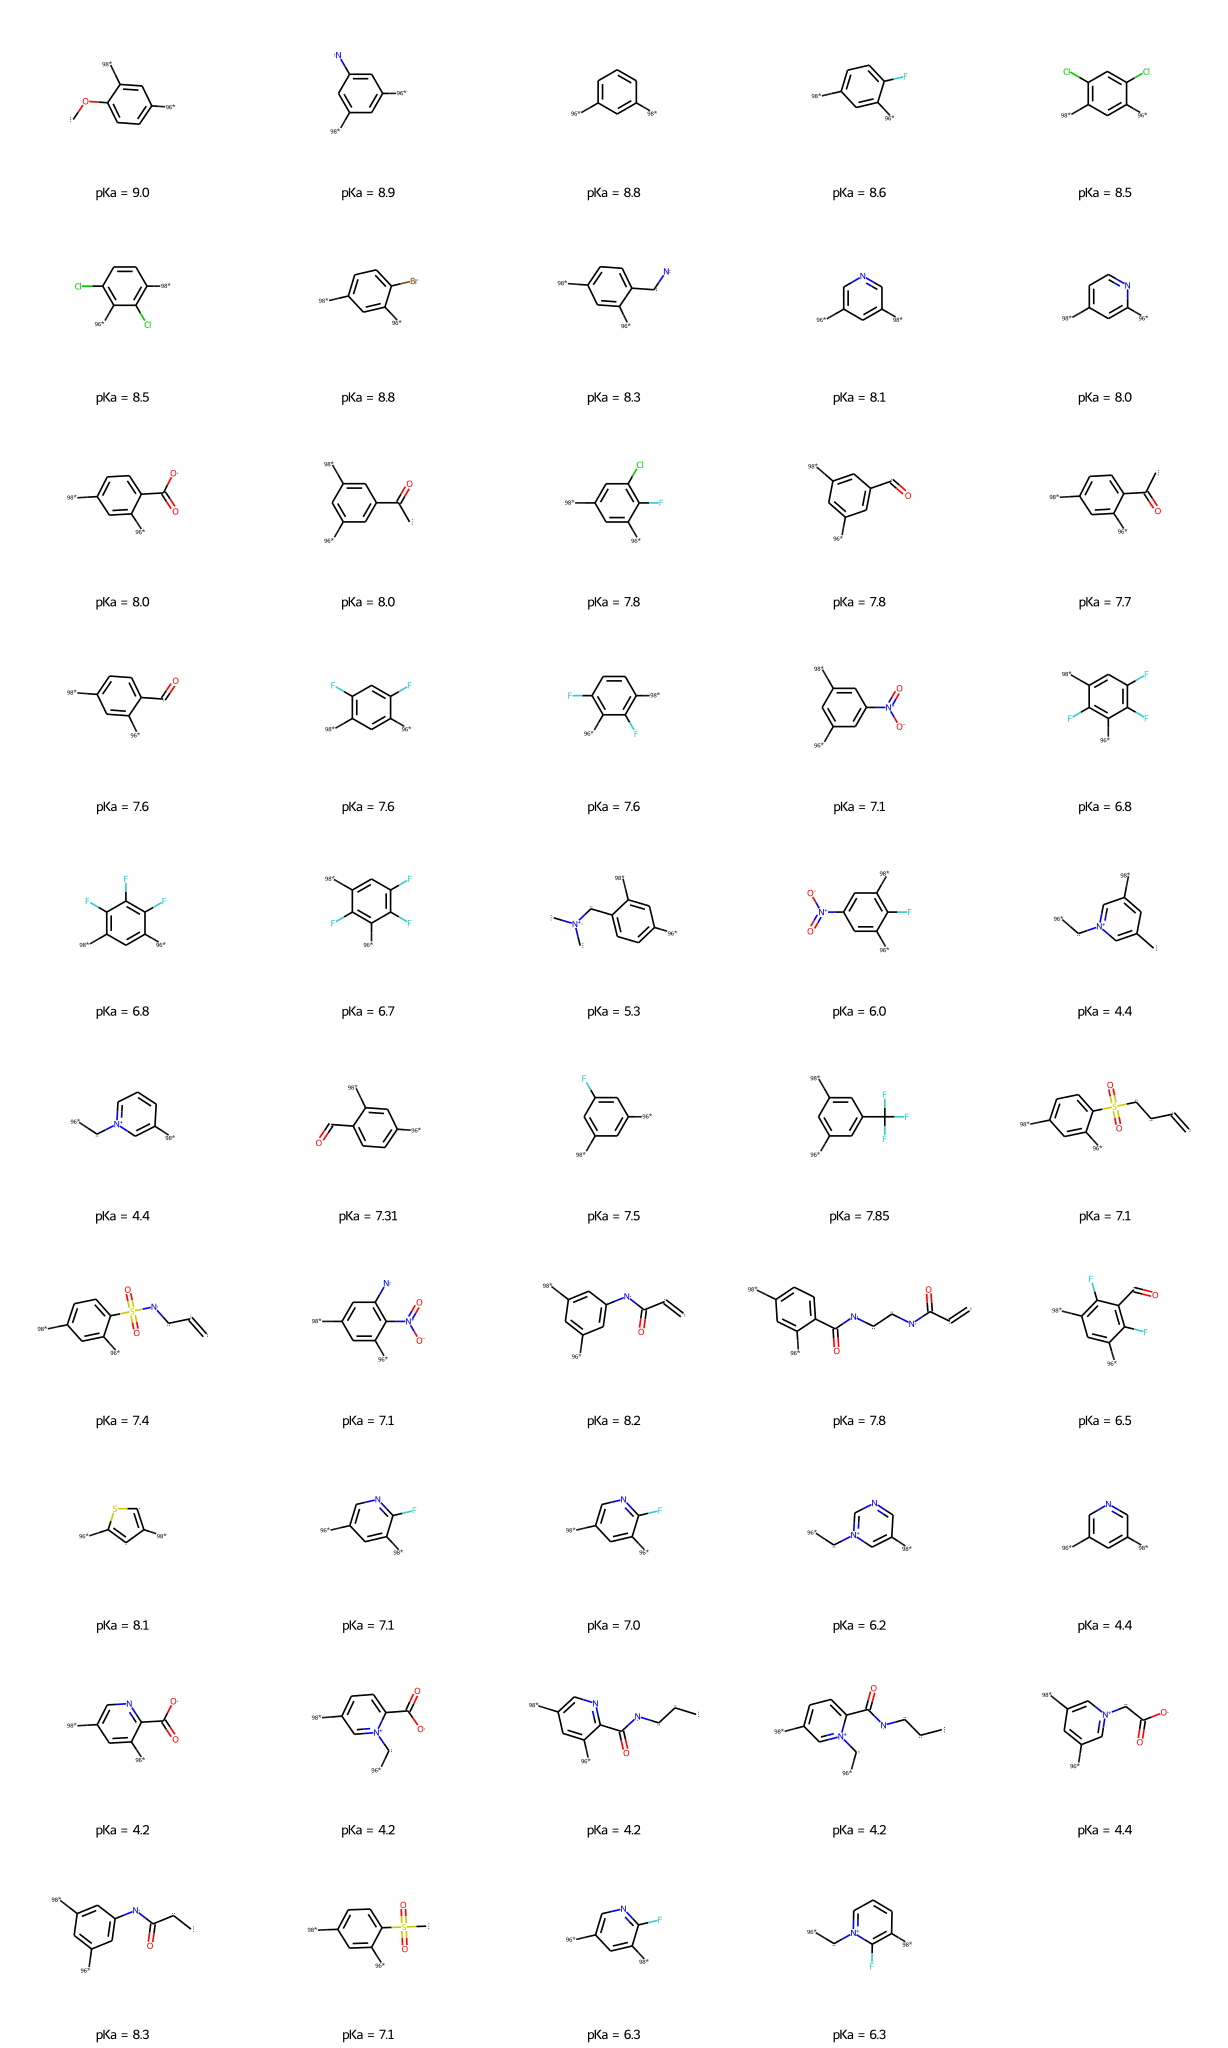

In [5]:
print(len(m_PBAs))
Draw.MolsToGridImage(m_PBAs, molsPerRow=5, subImgSize=(300,250), legends=pKas, useSVG=True)
#img.save('o_PBAs_mols.svg')

In [6]:
ortho=[['[#6]-[#8]-C1=CC=C(-[96*])C(-[98*])=C1', 9.0,-1], # 2-Methoxyphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#7]-C1=CC=C(-[96*])C(-[98*])=C1', 8.9,-1], # 3-Aminophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['[#7]-C1=CC=CC(-[98*])=C1-[96*]', 8.9,-1], # 3-Aminophenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=CC=C1-[98*]', 8.8,-1], # Phenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC=C(-[98*])C(-[96*])=C1', 8.6,-1],  # 4-Fluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['ClC1=CC(Cl)=C(-[98*])C(-[96*])=C1', 8.5,-1], # 2,4-Diclorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['BrC1=CC=C(-[98*])C(-[96*])=C1', 8.8,-1], # 4-Bromophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#7]-[#6]-C1=CC=C(-[98*])C(-[96*])=C1', 8.3,-1], # 4-Aminomethylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=NC=C1-[98*]', 8.1,-1], # 3-Pyridinylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CN=CC=C1-[98*]', 8.0,-1], # 4-Pyridinylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#8]-[#6](=O)-C1=CC=C(-[98*])C(-[96*])=C1', 8.0, -1], # 4-Carboxyphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#6](=O)-C1=CC=CC(-[98*])=C1-[96*]', 8.0,-1], # 3-Acetophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#6](=O)-C1=CC=C(-[96*])C(-[98*])=C1', 8.0,-1], # 3-Acetophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(-[96*])=C(-[98*])C=C1Cl', 7.8,-1], # 3-Chloro-4-fluorophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC=C(-[98*])C(-[96*])=C1Cl', 7.8,-1], # 3-Chloro-4-fluorophenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#6](=O)-C1=CC=C(-[98*])C(-[96*])=C1', 7.7, -1], # 4-Acetylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC(-[#6]=O)=CC=C1-[98*]', 8.0, -1], # 3-Acetophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(-[96*])=C(-[98*])C=C1Cl', 7.8,-1], # 3-Chloro-4-fluorophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC=C(-[98*])C(-[96*])=C1Cl', 7.8,-1], # 3-Chloro-4-fluorophenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=C(-[98*])C=CC=C1-[#6]=O', 7.8,-1], # 3-Formylphenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=C(-[#6]=O)C=C1-[98*]', 7.8,-1], # 3-Formylphenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#6](=O)-C1=CC=C(-[98*])C(-[96*])=C1', 7.7,-1], # 4-Acetylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#6](=O)-C1=CC=C(-[98*])C(-[96*])=C1', 7.6,-1], # 4-Formylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(F)=C(-[98*])C(-[96*])=C1', 7.6, -1], # 2,4-Difluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#8-]-[#7+](=O)-C1=CC=C(-[96*])C(-[98*])=C1', 7.1,-1], # 3-Nitrophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['[#8-]-[#7+](=O)-C1=CC=CC(-[98*])=C1-[96*]', 7.1,-1], # 3-Nitrophenylboronic acid 2 DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC=C(F)C(-[98*])=C1-[96*]', 7.0,-1], # 2,5-Diflourophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(F)=C(-[98*])C(-[96*])=C1F', 6.8,-1], # 3,4,5-Trifluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(-[96*])=C(-[98*])C(F)=C1F', 6.8,-1], # 2,3,4-Trifluorophenylboronic acid DOI:10.1016/j.tet.2004.08.051                          
    ['FC1=CC=C(-[#6]=O)C(-[98*])=C1-[96*]', 6.72,-1], # 5-ﬂuoro-2-formylphenylboronic Acid DOI:10.3390/molecules25040799
    ['FC(F)(F)C1=CC=C(-[#6]=O)C(-[98*])=C1-[96*]', 6.72,-1], #5-Triﬂuoromethyl-2-formylphenylboronic Acid DOI:10.3390/molecules25040799
    ['[#8-]-[#7+](=O)-C1=CC=C(F)C(-[98*])=C1-[96*]', 6.0,-1], # 2-Fluoro-5-nitrophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=CC(-[#6]=O)=C1-[98*]', 7.31,-1], # 2-Formylphenilboronic acid DOI:10.3390/molecules25040799
    ['FC1=CC=C(-[96*])C(-[98*])=C1', 7.5, -1], # 3-Fluorophenilboronic acid DOI:10.3390/molecules25040799
    ['FC1=CC=CC(-[98*])=C1-[96*]', 7.5,-1], # 3-Fluorophenilboronic acid DOI:10.3390/molecules25040799
    ['FC(F)(F)C1=CC=C(-[96*])C(-[98*])=C1', 7.85,-1], # 3-Metiltrifluorophenilboronic acid DOI:10.3390/molecules25040799
    ['[96*]-C1=CC(=CC=C1-[98*])S(=O)(=O)[#6]-[#6]-[#6]=[#6]', 7.1,-1], # 4-(3-butenylsulfonyl)phenylboronic acid BSPBA DOI:10.1016/j.ab.2007.09.001 Bonding to silicon trough double bond in alkyl chain
    ['[96*]-C1=CC(=CC=C1-[98*])S(=O)(=O)[#7]-[#6]-[#6]=[#6]', 7.4,-1], # 4-(N-allylsulfamoyl)phenylboronic acid BSPBA DOI:10.1016/j.ab.2007.09.001 Bonding to silicon trough double bond in alkyl chain
    ['[#7]-C1=CC(-[98*])=C(-[96*])C=C1-[#7+](-[#8-])=O', 7.1,-1], # (3-amino-4nitrophenyl)boronic acid DOI: 10.1016/S1872-2040(07)60007-3 Binding to silica the amino group
    ['[#7]-C1=C(-[96*])C(-[98*])=CC=C1-[#7+](-[#8-])=O', 7.1,-1], # (3-amino-4nitrophenyl)boronic acid DOI: 10.1016/S1872-2040(07)60007-3 Binding to silica the amino group
    ['[96*]-C1=C(-[98*])C=CC=C1-[#7]-[#6](=O)-[#6]=[#6]', 8.2,-1], # 3-acrylamidophenylboronic acid (AAPBA) See the review DOI: 10.1039/C5CS00013K
    ['[96*]-C1=CC=C(-[#7]-[#6](=O)-[#6]=[#6])C=C1-[98*]', 8.2,-1], # 3-acrylamidophenylboronic acid (AAPBA) See the review DOI: 10.1039/C5CS00013K
    ['[96*]-C1=CC(=CC=C1-[98*])-[#6](=O)-[#7]-[#6]-[#6]-[#7]-[#6](=O)-[#6]=[#6]', 7.8 ,-1], # 4-(1,6-dioxo-2,5-diaza-7-oxamyl-)-phenylboronic acid (DDOPPA)  See the review DOI: 10.1039/C5CS00013K
    ['FC1=CC(-[96*])=C(-[98*])C(F)=C1-[#6]=O', 6.5,-1], # 2,4-difluoro-3-formyl-phenylboronicacid (DFFPBA) See the review DOI: 10.1039/C5CS00013K
    #['[96*]-c1cccc2-[#6]-[#8]-[98*]-c12', 7.2,0], # Benzoboroxole DOI: 10.1021/jo800788s Bonding with trans 4-6 diols prefered over trans 3-4 diol as in glucose.
    #['[#8]-[#6](=O)-c1ccc2-[#6]-[#8]-[98*]-c2c1-[96*]', 7.2,0], # Benzoboroxolebenzaldehide Binding to polimer throug carboxilic acid. Asummed to be similar to Benzoboroxole DOI: 10.1021/jo800788s
    ['[96*]-[#6]-1=[#6]-[#16]-[#6]=[#6]-1-[98*]', 8.1,-1], # 3-thiopeneboronic acid DOI: 10.3390/chemosensors10070251 Read this paper, has some thermochemical measures
    ['[96*]-[#6]-1=[#6](-[98*])-[#6]=[#6]-[#16]-1', 8.1,-1], # 3-thiopeneboronic acid DOI: 10.3390/chemosensors10070251 Read this paper, has some thermochemical measures
    ['FC1=NC=CC(-[96*])=C1-[98*]', 7.1,-1], # 2-fluoro-3-pyridylboronic acid or 2F-3-PyBA   DOI: 10.1021/ol5036003
    ['FC1=CC(-[96*])=C(-[98*])C=N1', 7.0,-1], # 2-fluoro-5-pyridylboronic acid or 2F-5-PyBA  DOI: 10.1021/ol5036003
    ['FC1=CC=C(-[98*])C(-[96*])=N1', 7.0,-1], # 2-fluoro-5-pyridylboronic acid or 2F-5-PyBA DOI: 10.1021/ol5036003
    ['[96*]-C1=NC=NC=C1-[98*]', 6.2, -1], # pyrimidine-5-boronic acid DOI:10.1039/c7sc01905j
    ['[96*]-C1=CC=NC=C1-[98*]',  4.4, -1],  # 3-pyridylboronic acid DOI:10.1039/c7sc01905j
    ['[96*]-C1=NC=CC=C1-[98*]',  4.4, -1],  # 3-pyridylboronic acid DOI:10.1039/c7sc01905j
    ['[#8]-[#6](=O)-C1=CC(-[96*])=C(-[98*])C=N1', 4.2, -1], # 5-boronopicolinic acid DOI:10.1039/c7sc01905j
    ['[#8]-[#6](=O)-C1=CC=C(-[98*])C(-[96*])=N1', 4.2, -1], # 5-boronopicolinic acid DOI:10.1039/c7sc01905j
    ['[#6]-[#6]-[#6]-[#7]-[#6](=O)-C1=CC(-[96*])=C(-[98*])C=N1', 4.2,-1], # (6-propylcarbamoyl)pyridine-3-boronic acid DOI:10.1039/c7sc01905j
    ['[#6]-[#6]-[#6]-[#7]-[#6](=O)-C1=CC=C(-[98*])C(-[96*])=N1', 4.2,-1], # (6-propylcarbamoyl)pyridine-3-boronic acid DOI:10.1039/c7sc01905j
    ['[#8]-[#6](=O)-[#6]-[N+]1=CC=CC(-[98*])=C1-[96*]', 4.4,-1], # 3-borono-1-(carboxymethyl)pyridine DOI:10.1039/c7sc01905j
    ['[#8]-[#6](=O)-[#6]-[N+]1=CC=C(-[96*])C(-[98*])=C1', 4.4,-1], # 3-borono-1-(carboxymethyl)pyridine DOI:10.1039/c7sc01905j
    ['[#6]-[#6]-[#6](=O)-[#7]-C1=CC=C(-[96*])C(-[98*])=C1', 8.3,-1], # 3-propionamidophenylboronic acid DOI:10.1039/c7sc01905j
    ['[#6]-[#6]-[#6](=O)-[#7]-C1=CC=CC(-[98*])=C1-[96*]', 8.3,-1], # 3-propionamidophenylboronic acid DOI:10.1039/c7sc01905j
    ['[#6]S(=O)(=O)C1=CC=C(-[98*])C=C1-[96*]', 7.1,-1], # 4-(methylsulfonyl)benzeneboronic acid DOI:10.1039/c7sc01905j pKa approx
    ['FC1=NC=CC(-[96*])=C1-[98*]', 6.3,-1]] # 2-Fluoro-3-pyridyl boronic acid DOI:10.1039/c7sc01905j
    

In [7]:
o_PBAs = []
pKas = []
for line in ortho:
    m_d = Chem.MolFromSmiles(line[0])
    print('New PBA')
    print(line[0])
    #Chem.SanitizeMol(m)
    m = Chem.MolFromSmiles(Chem.MolToSmiles(m_d))
    o_PBAs.append(m)
    pKas.append('pKa = '+str(line[1]))
    print(Chem.MolToSmarts(m))
    print(Chem.MolToSmiles(m))

New PBA
[#6]-[#8]-C1=CC=C(-[96*])C(-[98*])=C1
[96#0]-[#6]1:[#6]:[#6]:[#6](-[#8]-[#6]):[#6]:[#6]:1-[98#0]
[96*]c1ccc(O[C])cc1[98*]
New PBA
[#7]-C1=CC=C(-[96*])C(-[98*])=C1
[96#0]-[#6]1:[#6]:[#6]:[#6](-[#7]):[#6]:[#6]:1-[98#0]
[96*]c1ccc([N])cc1[98*]
New PBA
[#7]-C1=CC=CC(-[98*])=C1-[96*]
[96#0]-[#6]1:[#6](-[98#0]):[#6]:[#6]:[#6]:[#6]:1-[#7]
[96*]c1c([98*])cccc1[N]
New PBA
[96*]-C1=CC=CC=C1-[98*]
[96#0]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[98#0]
[96*]c1ccccc1[98*]
New PBA
FC1=CC=C(-[98*])C(-[96*])=C1
[96#0]-[#6]1:[#6]:[#6](-[#9]):[#6]:[#6]:[#6]:1-[98#0]
[96*]c1cc(F)ccc1[98*]
New PBA
ClC1=CC(Cl)=C(-[98*])C(-[96*])=C1
[96#0]-[#6]1:[#6]:[#6](-[#17]):[#6]:[#6](-[#17]):[#6]:1-[98#0]
[96*]c1cc(Cl)cc(Cl)c1[98*]
New PBA
BrC1=CC=C(-[98*])C(-[96*])=C1
[96#0]-[#6]1:[#6]:[#6](-[#35]):[#6]:[#6]:[#6]:1-[98#0]
[96*]c1cc(Br)ccc1[98*]
New PBA
[#7]-[#6]-C1=CC=C(-[98*])C(-[96*])=C1
[96#0]-[#6]1:[#6]:[#6](-[#6]-[#7]):[#6]:[#6]:[#6]:1-[98#0]
[96*]c1cc([C][N])ccc1[98*]
New PBA
[96*]-C1=CC=NC=C1-[98*]
[96#0]-[#6]

62


/users/glara/anaconda3/envs/rdkit-env/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


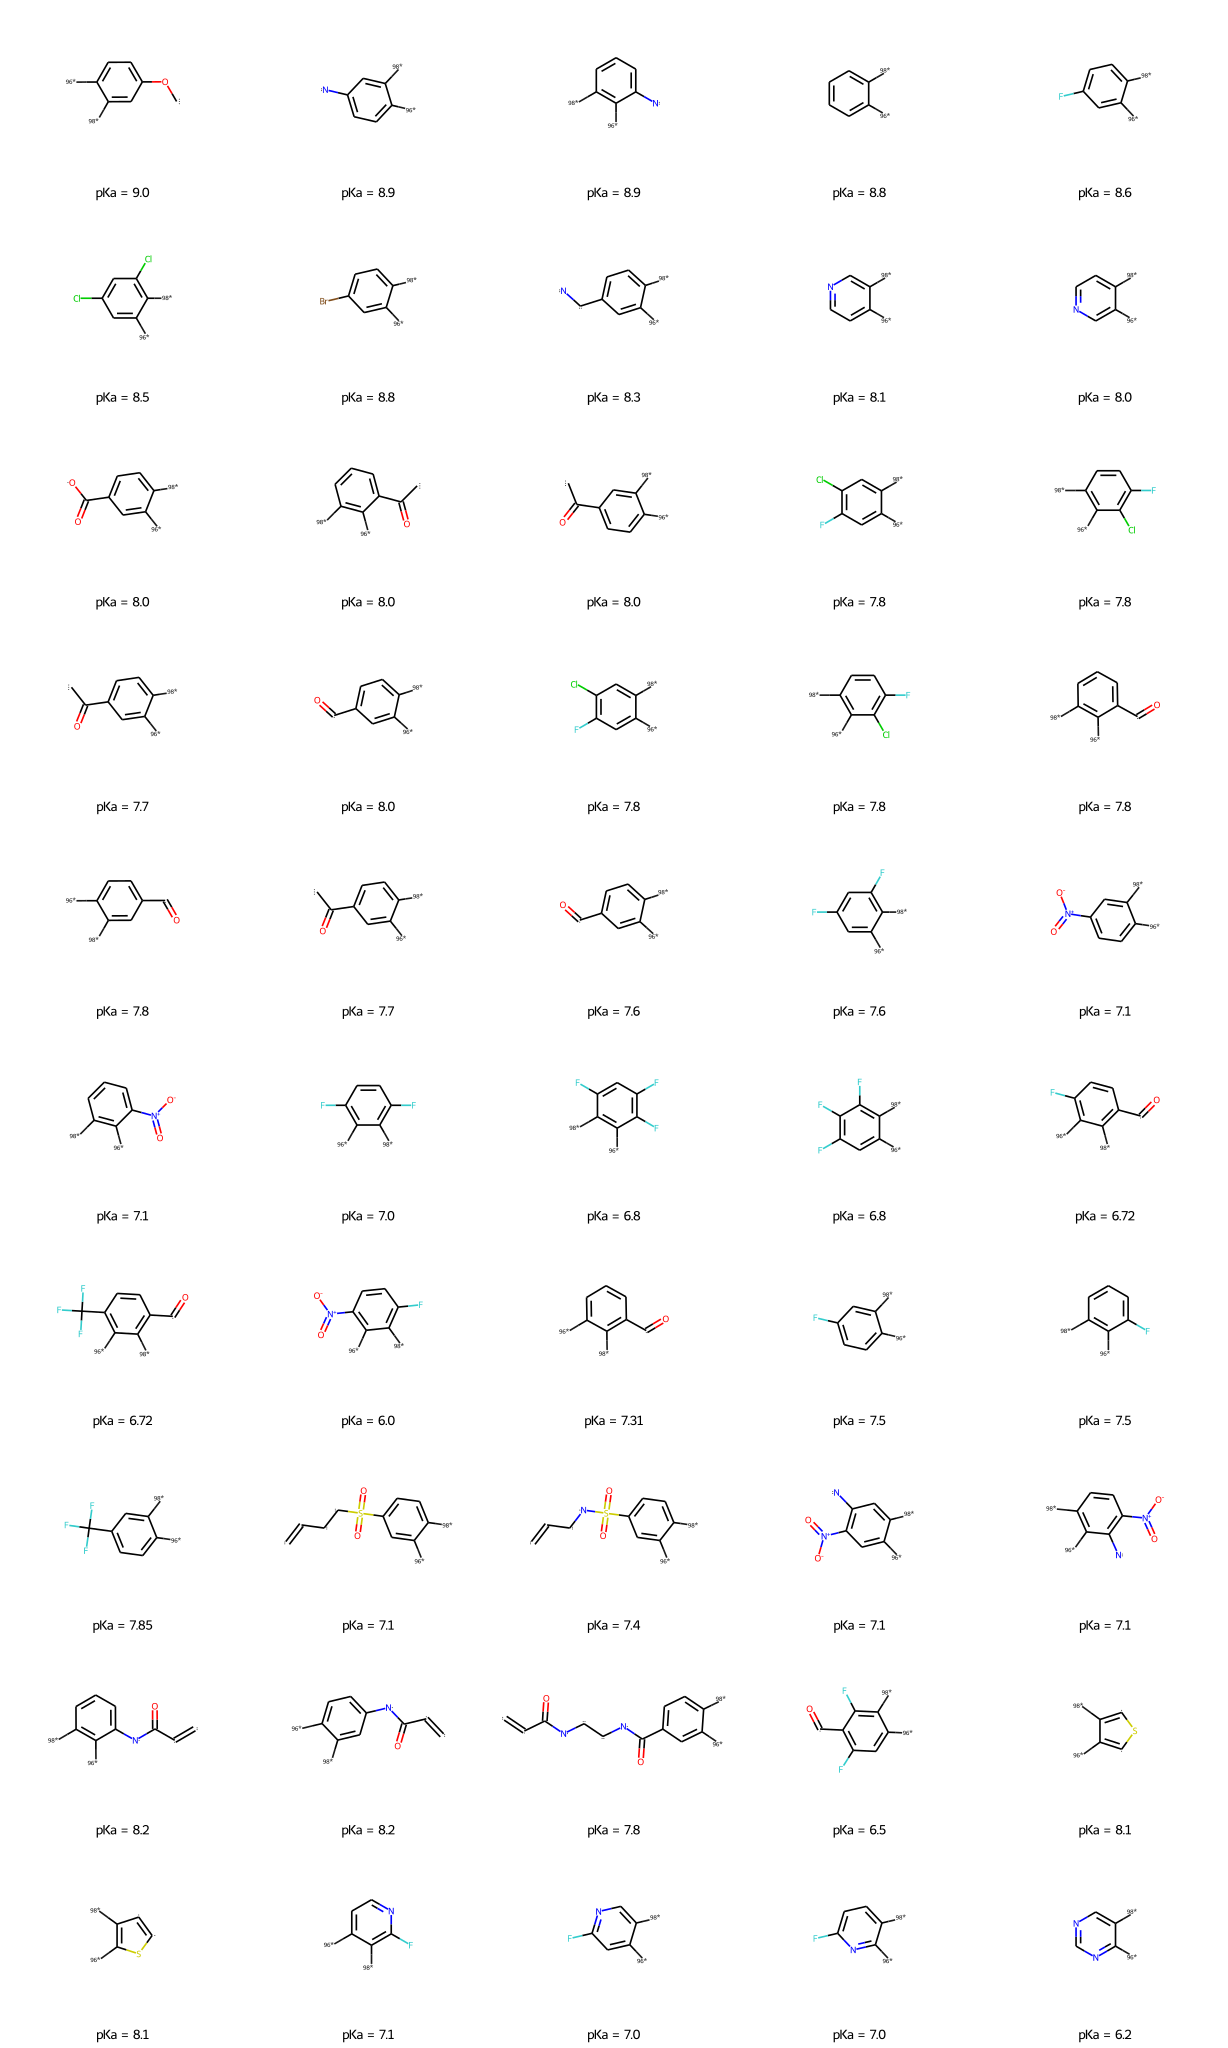

In [8]:
print(len(o_PBAs))
Draw.MolsToGridImage(o_PBAs, molsPerRow=5, subImgSize=(300,250), legends=pKas, useSVG=True)
#img.save('o_PBAs_mols.svg')

In [9]:
para=[['[#7]-C1=CC(-[98*])=CC=C1-[96*]', 8.9,-1], # 3-Aminophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=C(-[98*])C=C1', 8.8,-1], # Phenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=C(-[98*])C=N1', 8.1,-1], # 3-Pyridinylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#6]-[#6](=O)-C1=CC(-[98*])=CC=C1-[96*]', 8.0,-1], # 3-Acetophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=C(-[98*])C=C1-[#6]=O', 7.8,-1], # 3-Formylphenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#8-]-[#7+](=O)-C1=CC(-[98*])=CC=C1-[96*]', 7.1,-1], # 3-Nitrophenylboronic acid 1 DOI:10.1016/j.tet.2004.08.051
    ['FC1=CC(-[98*])=C(F)C=C1-[96*]', 7.0,-1], # 2,5-Diflourophenylboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[#8-]-[#7+](=O)-C1=CC(-[98*])=C(F)C=C1-[96*]', 6.0,-1], # 2-Fluoro-5-nitrophenylboronic acid DOI:10.1016/j.tet.2004.08.051        
    ['[96*]-[#6]-[N+]1=CC=C(-[98*])C=C1', 4.4,-1], # 4-Methylpyridineboronic acid DOI:10.1016/j.tet.2004.08.051
    ['[96*]-C1=CC=C(-[98*])C(-[#6]=O)=C1', 7.31,-1], # 2-Formylphenilboronic acid DOI:10.3390/molecules25040799
    ['FC1=CC(-[98*])=CC=C1-[96*]', 7.5,-1], # 3-Fluorophenilboronic acid DOI:10.3390/molecules25040799
    ['FC(F)(F)C1=CC(-[98*])=CC=C1-[96*]', 7.85,-1], # 3-Metiltrifluorophenilboronic acid DOI:10.3390/molecules25040799
    ['[96*]-C1=CC=C(-[98*])C=C1-[#7]-[#6](=O)-[#6]=[#6]', 8.2 ,-1], # 3-acrylamidophenylboronic acid (AAPBA) See the review DOI: 10.1039/C5CS00013K 
    ['[96*]-C1=CC=C(-[98*])C=C1-[#6](=O)-[#7]-[#6]-[#6]-[#7]-[#6](=O)-[#6]=[#6]',7.8], # 4-(1,6-dioxo-2,5-diaza-7-oxamyl-)-phenylboronic acid (DDOPPA)
    #['[96*]-c1ccc2-[98*]-[#8]-[#6]-c2c1'. 7.2,0], # Benzoboroxole DOI: 10.1021/jo800788s Bonding with trans 4-6 diols prefered over trans 3-4 diol as in glucose.
    #['[#8]-[#6](=O)-c1cc2-[98*]-[#8]-[#6]-c2cc1-[96*]', 7.2,0], # Benzoboroxolebenzaldehide Binding to polimer throug carboxilic acid. Asummed to be similar to Benzoboroxole DOI: 10.1021/jo800788s
    ['FC1=NC(-[96*])=CC=C1-[98*]', 7.1,-1], # 2-fluoro-3-pyridylboronic acid or 2F-3-PyBA DOI: 10.1021/ol5036003
    ['[96*]-C1=NC=C(-[98*])C=N1', 6.2,-1], # pyrimidine-5-boronic acid DOI:10.1039/c7sc01905j
    ['[96*]-C1=CC=C(-[98*])C=N1', 4.4,-1],  # 3-pyridylboronic acid DOI:10.1039/c7sc01905j
    ['[#8]-[#6](=O)-[#6]-[N+]1=CC(-[98*])=CC=C1-[96*]', 4.4,-1], # 3-borono-1-(carboxymethyl)pyridine DOI:10.1039/c7sc01905j
    ['[#6]-[#6]-[#6](=O)-[#7]-C1=CC(-[98*])=CC=C1-[96*]', 8.3, -1], # 3-propionamidophenylboronic acid DOI:10.1039/c7sc01905j
    ['FC1=NC(-[96*])=CC=C1-[98*]',6.3,-1]] # 2-Fluoro-3-pyridyl boronic acid DOI:10.1039/c7sc01905j

In [10]:
p_PBAs = []
pKas = []
for line in para:
    m_d = Chem.MolFromSmiles(line[0])
    print('New PBA')
    print(line[0])
    #Chem.SanitizeMol(m)
    m = Chem.MolFromSmiles(Chem.MolToSmiles(m_d))
    p_PBAs.append(m)
    pKas.append('pKa = '+str(line[1]))
    print(Chem.MolToSmarts(m))
    print(Chem.MolToSmiles(m))

New PBA
[#7]-C1=CC(-[98*])=CC=C1-[96*]
[96#0]-[#6]1:[#6]:[#6]:[#6](-[98#0]):[#6]:[#6]:1-[#7]
[96*]c1ccc([98*])cc1[N]
New PBA
[96*]-C1=CC=C(-[98*])C=C1
[96#0]-[#6]1:[#6]:[#6]:[#6](-[98#0]):[#6]:[#6]:1
[96*]c1ccc([98*])cc1
New PBA
[96*]-C1=CC=C(-[98*])C=N1
[96#0]-[#6]1:[#6]:[#6]:[#6](-[98#0]):[#6]:[#7]:1
[96*]c1ccc([98*])cn1
New PBA
[#6]-[#6](=O)-C1=CC(-[98*])=CC=C1-[96*]
[96#0]-[#6]1:[#6]:[#6]:[#6](-[98#0]):[#6]:[#6]:1-[#6](-[#6])=[#8]
[96*]c1ccc([98*])cc1C([C])=O
New PBA
[96*]-C1=CC=C(-[98*])C=C1-[#6]=O
[96#0]-[#6]1:[#6]:[#6]:[#6](-[98#0]):[#6]:[#6]:1-[#6]=[#8]
[96*]c1ccc([98*])cc1[C]=O
New PBA
[#8-]-[#7+](=O)-C1=CC(-[98*])=CC=C1-[96*]
[96#0]-[#6]1:[#6]:[#6]:[#6](-[98#0]):[#6]:[#6]:1-[#7+](=[#8])-[#8-]
[96*]c1ccc([98*])cc1[N+](=O)[O-]
New PBA
FC1=CC(-[98*])=C(F)C=C1-[96*]
[96#0]-[#6]1:[#6]:[#6](-[#9]):[#6](-[98#0]):[#6]:[#6]:1-[#9]
[96*]c1cc(F)c([98*])cc1F
New PBA
[#8-]-[#7+](=O)-C1=CC(-[98*])=C(F)C=C1-[96*]
[96#0]-[#6]1:[#6]:[#6](-[#9]):[#6](-[98#0]):[#6]:[#6]:1-[#7+](=[#8])-[#8-]
[96

20


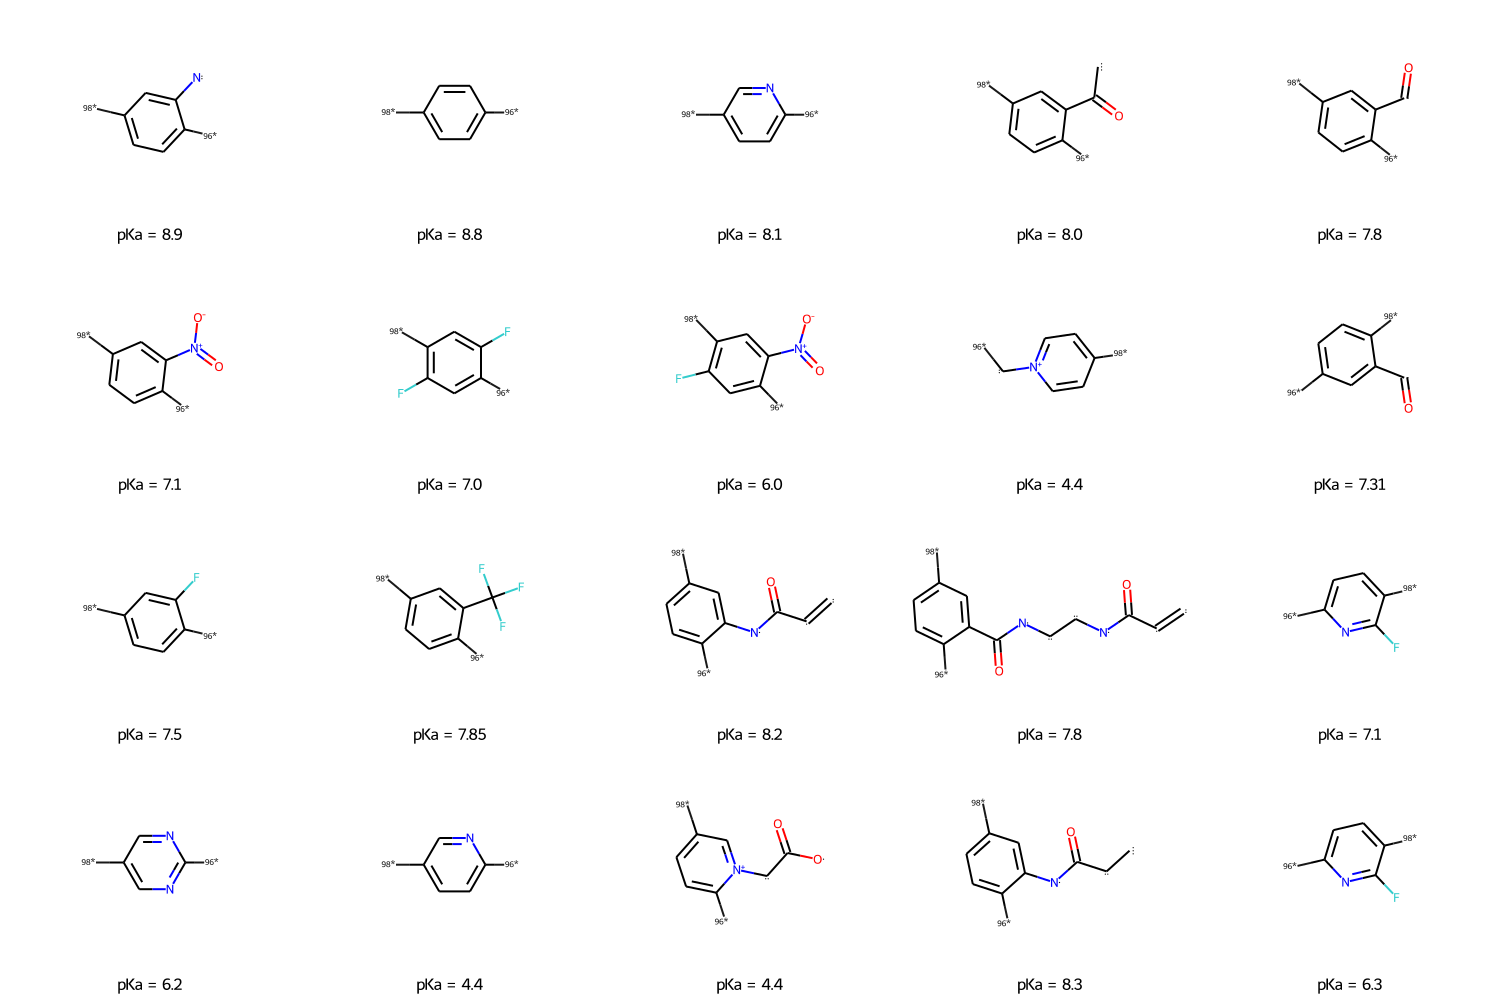

In [11]:
print(len(p_PBAs))
Draw.MolsToGridImage(p_PBAs, molsPerRow=5, subImgSize=(300,250), legends=pKas, useSVG=True)

In [1]:
#!jupyter nbconvert --to script PBAs_molecules.ipynb

[NbConvertApp] Converting notebook PBAs_molecules.ipynb to script
[NbConvertApp] Writing 18560 bytes to PBAs_molecules.py


In [1]:
#!jupyter nbconvert --to script PBAs_molecules.ipynb

[NbConvertApp] Converting notebook PBAs_molecules.ipynb to script
[NbConvertApp] Writing 18560 bytes to PBAs_molecules.py


In [12]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import rdDepictor
import rdkit
import csv

def dummy2BO3_sim(mol):
    """
    Function to convert the dummy atoms *98 and *99 into boronic groups
    """
    dummy_glc = "[" + str(98) + "*]"
    dummy_frc = "[" + str(99) + "*]"
    dummy_H1 = "[" + str(96) + "*]"
    dummy_H2 = "[" + str(97) + "*]"
    ligBO3 = Chem.ReplaceSubstructs(mol, 
                                    Chem.MolFromSmiles(dummy_glc), 
                                    Chem.MolFromSmiles('[B-](O)(O)(O)'),
                                    replaceAll=True)

    ligBO3_2 = Chem.ReplaceSubstructs(ligBO3[0], 
                                 Chem.MolFromSmiles(dummy_frc), 
                                 Chem.MolFromSmiles('[B-](O)(O)(O)'),
                                 replaceAll=True)

    em = Chem.RWMol(ligBO3_2[0])
    em.BeginBatchEdit()
    for atom in em.GetAtoms():
        #print(atom.GetIdx(),atom.GetAtomicNum())
        if atom.GetAtomicNum() == 0:
            #print('Print dummy atom',atom.GetIdx())
            em.RemoveAtom(atom.GetIdx())
    em.CommitBatchEdit()
            
    return(em)
        
    """
    ligBO3_4 = Chem.ReplaceSubstructs(ligBO3_3[0], 
                                 Chem.MolFromSmiles(dummy_H2), 
                                 Chem.MolFromSmiles('H'),
                                 replaceAll=True)

    return ligBO3_4[0]
    """

131
[C]OC1=CC=CC=C1[B-](O)(O)O
[N]C1=CC=CC([B-](O)(O)O)=C1
O[B-](O)(O)C1=CC=CC=C1
O[B-](O)(O)C1=CC=C(F)C=C1
O[B-](O)(O)C1=C(Cl)C=C(Cl)C=C1
O[B-](O)(O)C1=CC=C(Cl)C=C1Cl
O[B-](O)(O)C1=CC=C(Br)C=C1
[N][C]C1=CC=C([B-](O)(O)O)C=C1
O[B-](O)(O)C1=CC=CN=C1
O[B-](O)(O)C1=CC=NC=C1
[O]C(=O)C1=CC=C([B-](O)(O)O)C=C1
[C]C(=O)C1=CC=CC([B-](O)(O)O)=C1
O[B-](O)(O)C1=CC(Cl)=C(F)C=C1
O=[C]C1=CC=CC([B-](O)(O)O)=C1
[C]C(=O)C1=CC=C([B-](O)(O)O)C=C1
O=[C]C1=CC=C([B-](O)(O)O)C=C1
O[B-](O)(O)C1=C(F)C=C(F)C=C1
O[B-](O)(O)C1=CC=C(F)C=C1F
O=[N+]([O-])C1=CC=CC([B-](O)(O)O)=C1
O[B-](O)(O)C1=C(F)C=C(F)C(F)=C1
O[B-](O)(O)C1=C(F)C(F)=C(F)C=C1
O[B-](O)(O)C1=C(F)C=C(F)C(F)=C1
[C][N+]([C])[C]C1=CC=CC=C1[B-](O)(O)O
O=[N+]([O-])C1=CC=C(F)C([B-](O)(O)O)=C1
[C]C1=CC([B-](O)(O)O)=C[N+]([C])=C1
[C][N+]1=CC=CC([B-](O)(O)O)=C1
O=[C]C1=CC=CC=C1[B-](O)(O)O
O[B-](O)(O)C1=CC(F)=CC=C1
O[B-](O)(O)C1=CC(C(F)(F)F)=CC=C1
[C]=[C][C][C]S(=O)(=O)C1=CC=C([B-](O)(O)O)C=C1
[C]=[C][C][N]S(=O)(=O)C1=CC=C([B-](O)(O)O)C=C1
[N]C1=CC([B-](O)(O)O)=CC

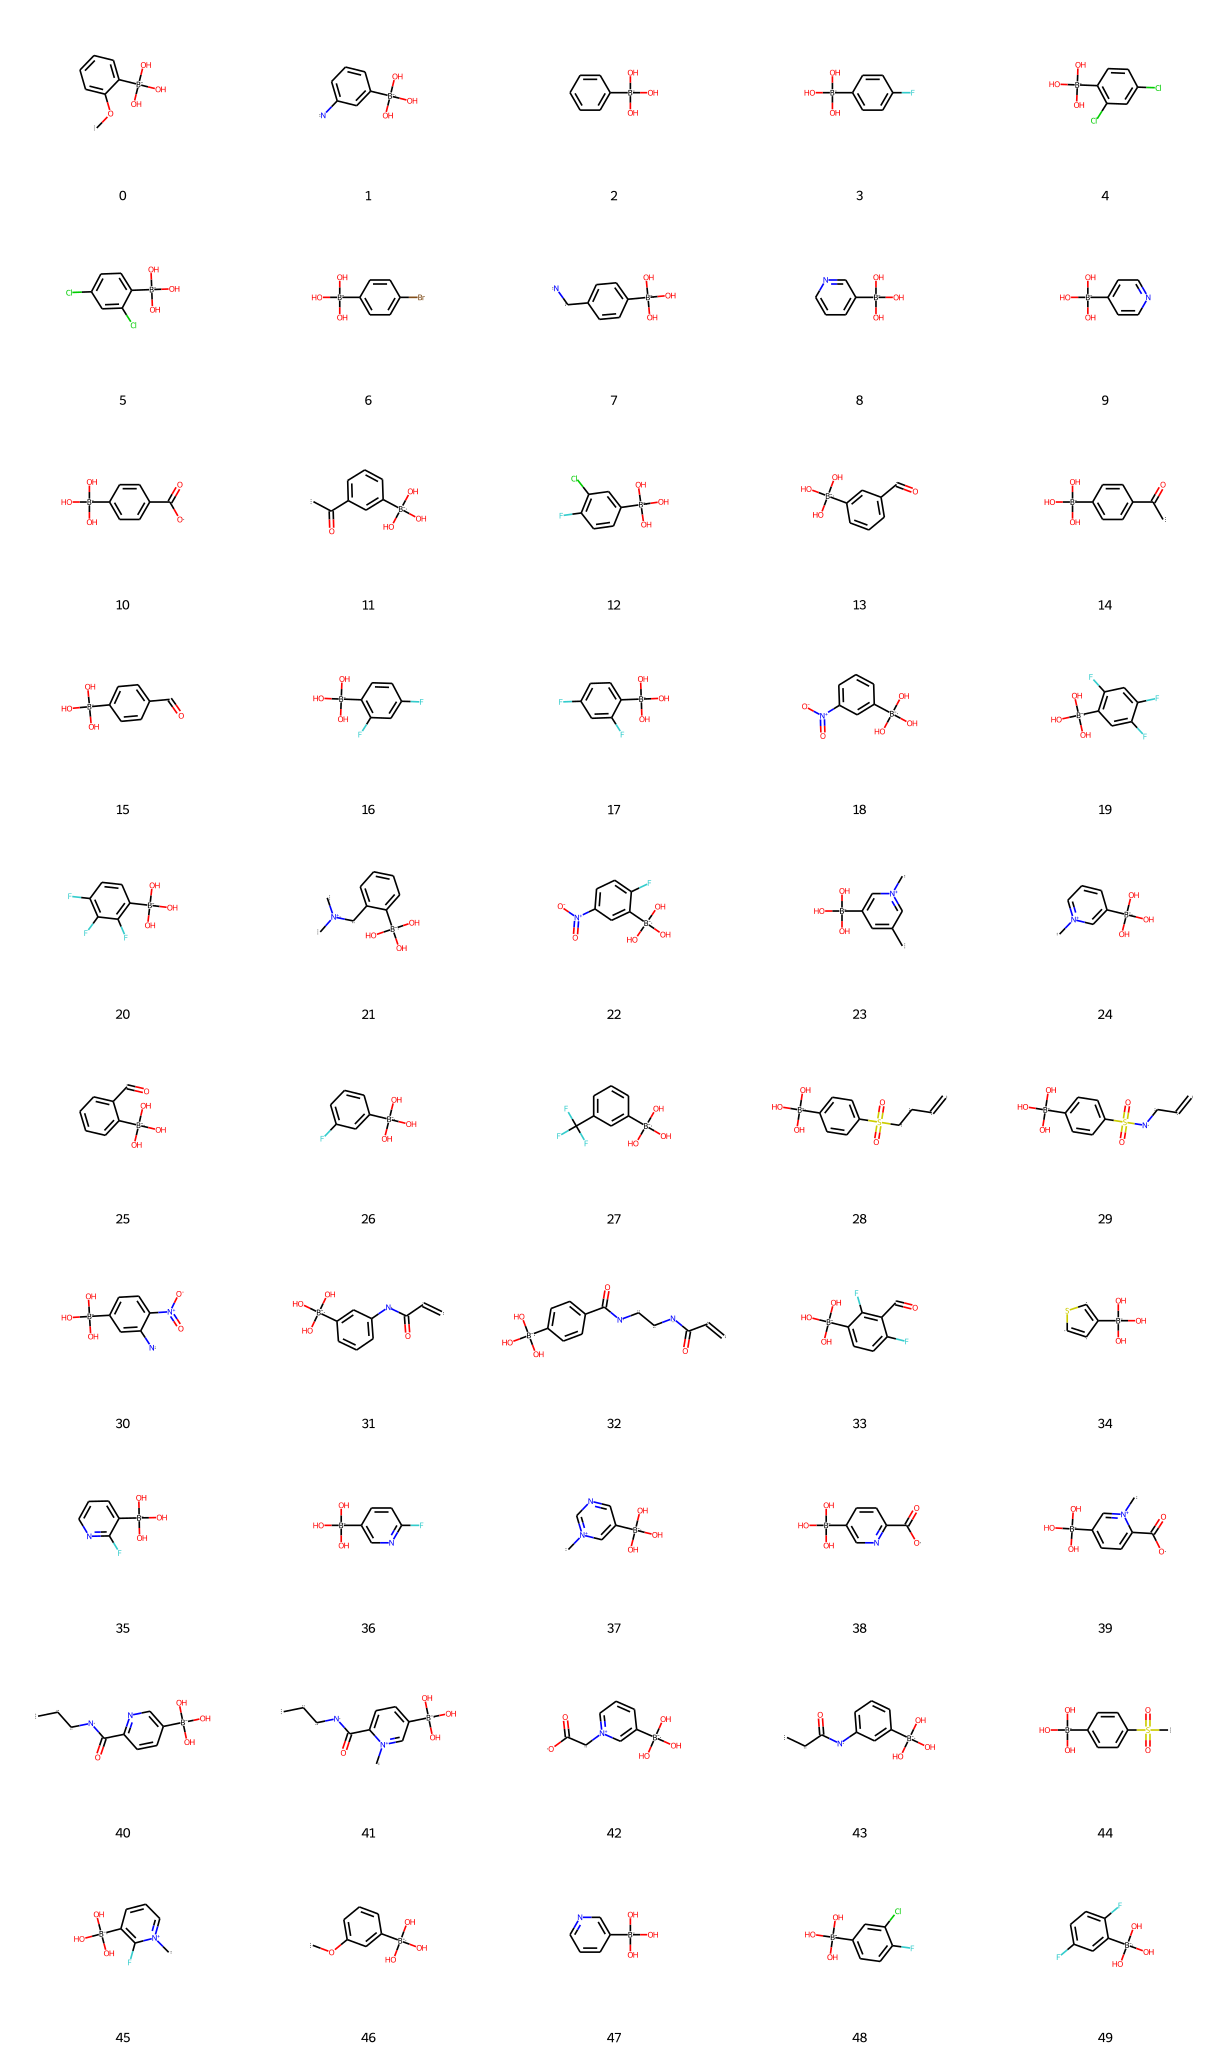

In [13]:
"""
Generation of the PBAs data file. Use this cell to generate the new archive for generation of PBAs SMILES for to be used in 
calculation of the pKa similaraties. 
"""
raw_PBAs = meta + ortho + para
print(len(raw_PBAs))
PBAs_smiles = []
PBAs_pKas = []
PBAs = []
idxs = []
idx = 0
PBA_data = []
for PBA_dummy in raw_PBAs:
    #m = Chem.MolFromSmarts(PBA_dummy[0])
    m = Chem.MolFromSmiles(PBA_dummy[0])
    PBA = dummy2BO3_sim(m)
    smiles = Chem.MolToSmiles(PBA,kekuleSmiles=True)
    print(smiles)
    Chem.SanitizeMol(PBA)
    #Chem.Kekulize(PBA)#, clearAromaticFlags=True)
    if smiles in PBAs_smiles:
        continue
    else:
        PBAs_smiles.append(smiles)
        PBAs_pKas.append(PBA_dummy[1])
        PBA_data.append([smiles,PBA_dummy[1]])
        PBAs.append(PBA)
        idxs.append(str(idx))
        idx += 1
print(PBAs_pKas)
print(len(PBAs_smiles))
Draw.MolsToGridImage(PBAs, molsPerRow=5, subImgSize=(300,250), useSVG=True, legends = idxs)

In [27]:
"""
Reading the PBAs smiles and pKas for fingerprints
"""
PBAs_fps = list()
pKas_data = []
with open('PBA_data4sim.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            mol = Chem.MolFromSmiles(row[0])
            pKas_data.append(row[1])
            PBAs_fps.append(AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=4086))
            line_count += 1

In [23]:
dummy_mol1 = 
dummy_mol2 = Chem.MolFromSmiles(' [96*]C1=CC=CC=C1[98*] ')


PBA2 = dummy2BO3(dummy_mol2)

Chem.SanitizeMol(PBA1)
Chem.SanitizeMol(PBA2)
print(Chem.MolToSmiles(PBA1))


fp_mol1 = AllChem.GetMorganFingerprintAsBitVect(PBA1, radius=3, nBits=4086)
fp_mol2 = AllChem.GetMorganFingerprintAsBitVect(PBA2, radius=3, nBits=4086)


SyntaxError: invalid syntax (1443030409.py, line 1)

In [220]:
def pKaFromSimmilarity(smiles,PBAs_fps,pKas_data):
    idx = 0
    max = -1
    mol = dummy2BO3_sim(Chem.MolFromSmarts(smiles))
    Chem.SanitizeMol(mol)
    fp_mol = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=4086)
    for fp in PBAs_fps:
        Tan_sim = Chem.DataStructs.TanimotoSimilarity(fp_mol,fp)
        Cosine_sim = Chem.DataStructs.CosineSimilarity(fp_mol,fp)
        Dice_sim = Chem.DataStructs.DiceSimilarity(fp_mol,fp)
        Consensus = (Tan_sim + Cosine_sim + Dice_sim)/3
    
        if Consensus > max:
            max = Consensus
            idx_max = idx
        idx += 1
            
    return pKas_data[idx_max]

In [234]:
smiles = '[96*]C1=C[N+](-C)=CC=C1[98*]'
pKa = pKaFromSimmilarity(smiles,PBAs_fps,pKas_data)
print(pKa)

0 0.13043478260869565 0.23076923076923078 0.23076923076923078 0.19732441471571907
1 0.13157894736842105 0.23782574707724702 0.23255813953488372 0.20065427799351723
2 0.15 0.2631174057921088 0.2608695652173913 0.22466232366983338
3 0.17777777777777778 0.3019405424385589 0.3018867924528302 0.2605350375563889
4 0.18181818181818182 0.3076923076923077 0.3076923076923077 0.2657342657342658
5 0.2 0.3344968040028363 0.3333333333333333 0.2892767124453899
8.5


In [198]:
#!jupyter nbconvert --to script PBAs_molecules.ipynb

[NbConvertApp] Converting notebook PBAs_molecules.ipynb to script
[NbConvertApp] Writing 22917 bytes to PBAs_molecules.py
